The questions that I am attempting to answer are: 
1) Where are people drinking mezcal in the United States? The NY Times published a piece last week about how people are going wild over mezcal, but it feels like a hipster phenomenon, and
2) How much has mezcal consumption increased/ what's the market share of mezcal in the US? 

I started by looking through data.gov for sales or import/ export information on mezcal, but nothing available has that granular of a breakdown. I tried hunting down US importers/ distributers to find data, but am not yet saavy enough to figure out how to get private business data. I then went back to the gov't databases and broadened my search for liquor taxes by state, but have only been able to find beer, wine, and hard alcohol tax policies for each individual state. Since mezcal comes from Mexico, I was able to find information about domestic and international sales through the mezcal council's website, which was all in PDF or powerpoint form (and Spanish!), but brief enough that I could manually enter the information into dataframes. 

I've found that mezcal accounts for a very small percentage of alcohol consumption and sales for Mexico, both domestically and internationally. I've also found that this isn't very interesting or compelling. 

Ideally, I would like to find historic alcohol consumption for each region of the US over the past 10 years, as well as my elusive mezcal sales data, and make a choropleth to chart the most popular types of alcohol across the country. Is whiskey most popular in the American south? Who knows! There are trendy hipsters drinking that up everywhere. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# percent market share of exported liquor
mexico_liquor_exports = {
    'category': ['local spirits', 'vodka', 'whisky', 'brandy', 'flavored spirits', 'rum', 'other spirits', 'aguardientes', 'gin', 'tequila', 'mezcal'],
    '2010' : [32.04, 16.66, 19.4, 8.02, 9.84, 5.77, 2.34, 1.65, 2.21, 2.05, .02],
    '2011' : [34.68, 15.83, 19.08, 7.94, 9.25, 5.45, 2.22, 1.53, 2.05, 1.94, .02],
    '2012' : [34.27, 16.35, 19.12, 8.21, 8.83, 5.35, 2.26, 1.53, 2.06, 2.01, .02],
    '2013' : [30.95, 17.53, 20.13, 8.34, 9.25, 5.55, 2.33, 1.5, 2.24, 2.16, .03],
    '2014' : [30.12, 16.17, 21.6, 8.33, 9.23, 5.77, 2.46, 1.55, 2.43, 2.3, .03],
    '2015' : [31.48, 15.14, 22.13, 8.02, 8.74, 5.63, 2.63, 1.22, 2.56, 2.42, .04]
}
df_mexports = pd.DataFrame(mexico_liquor_exports)
df_mexports

,category,2010,2011,2012,2013,2014,2015
0,local spirits,32.04,34.68,34.27,30.95,30.12,31.48
1,vodka,16.66,15.83,16.35,17.53,16.17,15.14
2,whisky,19.40,19.08,19.12,20.13,21.60,22.13
3,brandy,8.02,7.94,8.21,8.34,8.33,8.02
4,flavored spirits,9.84,9.25,8.83,9.25,9.23,8.74
5,rum,5.77,5.45,5.35,5.55,5.77,5.63
6,other spirits,2.34,2.22,2.26,2.33,2.46,2.63
7,aguardientes,1.65,1.53,1.53,1.50,1.55,1.22
8,gin,2.21,2.05,2.06,2.24,2.43,2.56
9,tequila,2.05,1.94,2.01,2.16,2.30,2.42


In [3]:
# percent market share for domestic liquor
mexico_liquor_domestic = {
    'category': ['tequila', 'aguardientes', 'whisky', 'brandy', 'rum', 'other spirits', 'vodka', 'mixed', 'mezcal', 'gin'],
    '2011' : [29, 21, 10, 12, 8, 8, 6, 5, 1.2, .2], 
    '2012' : [29, 21, 12, 11, 9, 7, 5, 5, 1.2, .2], 
    '2013' : [28, 22, 13, 10, 8, 7, 5, 5, 1.3, .3], 
    '2014' : [28, 23, 14, 9, 8, 7, 5, 4, 1.3, .3], 
    '2015' : [28, 23, 15, 8, 8, 7, 5, 4, 1.5, .4]
}
df_mdomestic = pd.DataFrame(mexico_liquor_domestic)
df_mdomestic
    

,category,2011,2012,2013,2014,2015
0,tequila,29.0,29.0,28.0,28.0,28.0
1,aguardientes,21.0,21.0,22.0,23.0,23.0
2,whisky,10.0,12.0,13.0,14.0,15.0
3,brandy,12.0,11.0,10.0,9.0,8.0
4,rum,8.0,9.0,8.0,8.0,8.0
5,other spirits,8.0,7.0,7.0,7.0,7.0
6,vodka,6.0,5.0,5.0,5.0,5.0
7,mixed,5.0,5.0,5.0,4.0,4.0
8,mezcal,1.2,1.2,1.3,1.3,1.5
9,gin,0.2,0.2,0.3,0.3,0.4


In [4]:
mezcal_markets = {
    'market' : ['domestic', 'international'],
    'liters_millions' : [2.1, 2.8],
    'bottles_millions' : [2.8, 3.7], 
    'average_price_pesos' : [382, 750],
    'total_revenue_ millions' : [1028, 2802]
}
df_markets = pd.DataFrame(mezcal_markets)
df_markets

,market,liters_millions,bottles_millions,average_price_pesos,total_revenue_ millions
0,domestic,2.1,2.8,382,1028
1,international,2.8,3.7,750,2802


In [5]:
int_market_share = {
    'country' : ['usa', 'spain', 'uk', 'france', 'canada', 'italy', 'australia', 'netherlands', 'germany', 'chile', 'other'],
    'percentage' : [64, 6, 5, 4, 4, 4, 3, 3, 3, 1, 2.4]
}
df_int_market_share = pd.DataFrame(int_market_share)
df_int_market_share

,country,percentage
0,usa,64.0
1,spain,6.0
2,uk,5.0
3,france,4.0
4,canada,4.0
5,italy,4.0
6,australia,3.0
7,netherlands,3.0
8,germany,3.0
9,chile,1.0


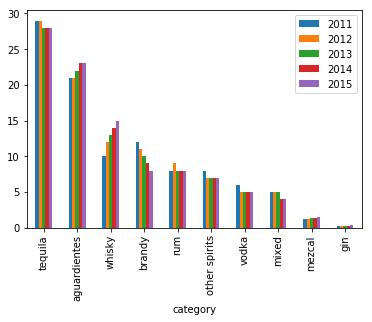

In [15]:
# domestic consumption year over year
df_mdomestic.plot(x='category', kind='bar')

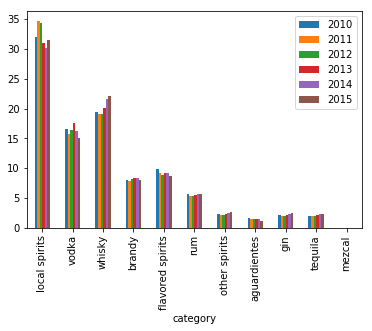

In [9]:
# exports year over year
df_mexports.plot(x='category', kind='bar')

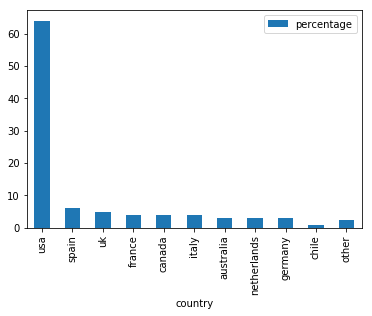

In [8]:
# 2017 countries importing mezcal
df_int_market_share.plot(kind='bar', x='country')